0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.07
0.08
0.09
0.09999999999999999
0.10999999999999999
0.11999999999999998
0.12999999999999998
0.13999999999999999
0.15
0.16
0.17
0.18000000000000002
0.19000000000000003
0.20000000000000004
0.21000000000000005
0.22000000000000006
0.23000000000000007
0.24000000000000007
0.25000000000000006
0.26000000000000006
0.2700000000000001
0.2800000000000001
0.2900000000000001
0.3000000000000001
0.3100000000000001
0.3200000000000001
0.3300000000000001
0.34000000000000014
0.35000000000000014
0.36000000000000015
0.37000000000000016
0.38000000000000017
0.3900000000000002
0.4000000000000002
0.4100000000000002
0.4200000000000002
0.4300000000000002
0.4400000000000002
0.45000000000000023
0.46000000000000024
0.47000000000000025
0.48000000000000026
0.49000000000000027
0.5000000000000002
0.5100000000000002
0.5200000000000002
0.5300000000000002
0.5400000000000003
0.5500000000000003
0.5600000000000003
0.5700000000000003
0.5800000000000003
0.5900000000000003
0.60000

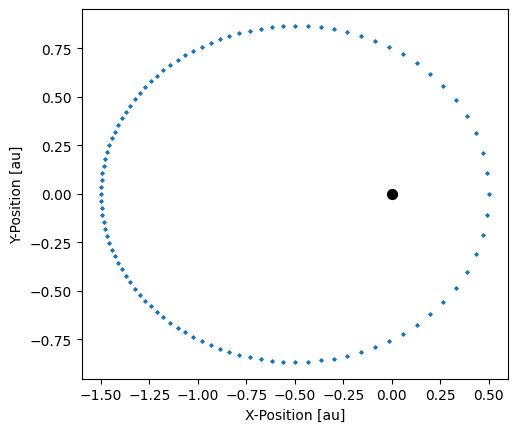

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def M(t, a):
    return 2 * np.pi / a**(3/2) * t


def keppler_equation(E, e, a, t):
    return E - e * np.sin(E) - M(t, a)

def keppler_equation_derivative(E, e, a, t):
    return 1 - e * np.cos(E)

def solve_keppler_equation(t, e=0.5, a=1):
    """ Solves the keppler equation using the newtons method """
    accuracy_threshhold = 1e-10
    max_iterations = 1000

   


    current_x_value = M(t, a) # this initial condition is given
    current_iteration = 0
    while(current_iteration < max_iterations):
        current_function_value = keppler_equation(current_x_value, e, a, t)
        current_derivative_value = keppler_equation_derivative(current_x_value, e, a, t)


        if(np.abs(current_function_value) < accuracy_threshhold):
            return current_x_value

        current_x_value = current_x_value - current_function_value / current_derivative_value
        current_iteration += 1
    
    print(f"Ran out of time: accuracy = {np.abs(current_function_value)}")
    return current_x_value

def pos(E, e=0.5, a=1):
    return (a * np.cos(E) - a * e, a * np.sqrt(1 - e**2) * np.sin(E))

current_time = 0
delta_time = 1/100
steps = 1000

positions = []
for i in range(steps):
    E = solve_keppler_equation(current_time)
    positions.append(pos(E))

    current_time += delta_time
    print(current_time)


positions = np.array(positions)
plt.scatter(positions[:, 0], positions[:, 1], s=2)
plt.scatter(0,0, s=50, color='black', edgecolors='black')

#plt.title(f"Orbit Path Simulation [a = {SEMI_MAYOR_AXIS_a}, e = {EXCENTRICITY_e}]")
plt.xlabel("X-Position [au]")
plt.ylabel("Y-Position [au]")

plt.gca().set_aspect('equal')
plt.show()